## Milestone 1

Link deployment : https://huggingface.co/spaces/galihsukmana/ML1_P1

## Introduction

Nama : Galih Sukmanaputra  

Batch : FTDS-005-HCK  

Dataset : From churn.csv. This dataset explained about the probability of customer churn.
  
Objective : Predicting the customer churn when using company product with tensorflow model machine learning.

## Import Libraries

Importing all of the libraries 

In [212]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Input, Dense, Dropout

from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import StandardScaler,MinMaxScaler,OrdinalEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix ,accuracy_score
from sklearn.metrics import roc_curve,roc_auc_score,precision_score, recall_score,precision_recall_curve,\
 confusion_matrix, classification_report, accuracy_score, f1_score


import pickle

import warnings
warnings.filterwarnings(action='ignore')

## Data Loading

Looking for feature and target from dataset

In [64]:
# Load Dataset

df = pd.read_csv("churn.csv")
df.head()

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,9f420209e7d129f3,29,F,NaN,No Membership,2017-04-05,Yes,Without Offers,NaN,Wi-Fi,...,1184.49,38604.69,10.0,627.48,Yes,Yes,Yes,No Information Available,Poor Website,1
1,ac6e97806267549e,50,M,NaN,Basic Membership,2017-03-31,Yes,Without Offers,Desktop,Fiber_Optic,...,338.15,7665.66,17.0,575.97,Yes,No,Yes,No Information Available,Poor Customer Service,1
2,a6aa19b1580eed4e,26,F,City,Silver Membership,2017-02-11,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,...,235.14,37671.69,5.0,767.93,Yes,No,Yes,No Information Available,Too many ads,0
3,aeee343277211c2f,63,F,Village,No Membership,2015-12-23,No,Credit/Debit Card Offers,Desktop,Fiber_Optic,...,56.67,15678.14,11.0,590.22,No,Yes,No,Not Applicable,Too many ads,1
4,82448b5c8ce6390c,64,M,Town,Silver Membership,2015-03-20,NaN,Gift Vouchers/Coupons,Smartphone,Wi-Fi,...,153.99,8422.68,0.0,722.04,Yes,No,No,Not Applicable,Poor Product Quality,0


In [65]:
df.tail()

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
37005,924e9c06f0c73817,36,M,Town,Gold Membership,2015-03-05,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,...,199.330000,29455.29,9.0,846.52,Yes,Yes,No,Not Applicable,User Friendly Website,0
37006,90e22286ac0acf04,27,F,City,Gold Membership,2017-01-15,Yes,Without Offers,Desktop,Wi-Fi,...,368.500000,27038.47,8.0,835.98,No,Yes,No,Not Applicable,Reasonable Price,0
37007,9329a6297407334a,20,M,NaN,Gold Membership,2015-07-11,Yes,Without Offers,NaN,Mobile_Data,...,272.130000,39305.35,27.0,714.90,Yes,Yes,Yes,Solved,Poor Customer Service,0
37008,a4403ddda8fcf9f3,38,F,City,Gold Membership,2016-05-25,Yes,Without Offers,Desktop,Wi-Fi,...,65.070000,46108.73,6.0,744.99,No,Yes,No,Not Applicable,Poor Website,0
37009,93b5d0330d24fa15,36,M,Town,Gold Membership,2016-10-18,NaN,Without Offers,Both,Fiber_Optic,...,972.776679,26905.49,22.0,700.93,Yes,No,Yes,No Information Available,Poor Customer Service,1


In [66]:
df[df.duplicated()]

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
3321,9f97903015fd0580,29,M,NaN,Silver Membership,2017-10-31,NaN,Credit/Debit Card Offers,Desktop,Fiber_Optic,...,67.850000,1228.39,16.0,712.300000,Yes,No,No,Not Applicable,No reason specified,0
9505,b0045613327d17fb,36,F,City,Platinum Membership,2016-03-07,No,Credit/Debit Card Offers,Desktop,Wi-Fi,...,210.640000,46466.03,9.0,716.450000,No,Yes,No,Not Applicable,Too many ads,0
11478,9ba8bf4d1e50100c,47,F,Town,Gold Membership,2016-07-10,No,Credit/Debit Card Offers,Both,Fiber_Optic,...,497.320000,15082.13,11.0,730.340000,No,Yes,Yes,Unsolved,No reason specified,0
12589,8f39faa74b6607e7,26,F,City,Premium Membership,2015-10-05,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,...,116.140000,26377.39,0.0,710.310000,Yes,No,Yes,Solved,No reason specified,0
14840,859745861c61ebef,35,M,City,Silver Membership,2016-03-27,Yes,Gift Vouchers/Coupons,Smartphone,Fiber_Optic,...,1064.763315,42483.66,28.0,702.110000,No,Yes,Yes,Solved in Follow-up,Too many ads,1
16165,9c8c2db425854d5e,54,M,NaN,Platinum Membership,2015-09-28,Yes,Without Offers,Smartphone,Fiber_Optic,...,1267.660000,38244.30,18.0,741.640000,No,Yes,No,Not Applicable,No reason specified,0
22341,9186d6f284e4ac5b,59,M,Town,Basic Membership,2015-01-07,NaN,Credit/Debit Card Offers,Desktop,Mobile_Data,...,266.190000,48632.63,19.0,654.590000,Yes,Yes,Yes,Unsolved,Poor Website,1
24693,930b39d136f072e3,56,M,Town,Premium Membership,2015-09-18,Yes,Gift Vouchers/Coupons,Smartphone,Fiber_Optic,...,150.620000,23164.44,16.0,775.190000,Yes,No,Yes,Solved,Poor Product Quality,0
26214,a594feaffc78b36b,58,M,City,Basic Membership,2017-04-01,Yes,Credit/Debit Card Offers,Desktop,Wi-Fi,...,0.000000,7614.88,29.0,202.317926,Yes,No,No,Not Applicable,Poor Customer Service,1
26687,9d20f093164c98a3,35,M,NaN,Platinum Membership,2016-06-08,No,Gift Vouchers/Coupons,Both,Fiber_Optic,...,228.570000,77844.85,14.0,714.280000,No,Yes,No,Not Applicable,User Friendly Website,0


There are 18 duplicated data

In [67]:
df.drop_duplicates(inplace=True)

duplicated handled

In [68]:
# Duplication dataset
data_duplicate = df.copy()

Duplicating basic data

In [69]:
# Check Dataset-1
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36992 entries, 0 to 37009
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   user_id                       36992 non-null  object 
 1   age                           36992 non-null  int64  
 2   gender                        36933 non-null  object 
 3   region_category               31564 non-null  object 
 4   membership_category           36992 non-null  object 
 5   joining_date                  36992 non-null  object 
 6   joined_through_referral       31554 non-null  object 
 7   preferred_offer_types         36704 non-null  object 
 8   medium_of_operation           31599 non-null  object 
 9   internet_option               36992 non-null  object 
 10  last_visit_time               36992 non-null  object 
 11  days_since_last_login         36992 non-null  int64  
 12  avg_time_spent                36992 non-null  float64
 13  a

Looking for type and information from each columns

In [70]:
df.isnull().sum() / df.shape[0] * 100

user_id                          0.000000
age                              0.000000
gender                           0.159494
region_category                 14.673443
membership_category              0.000000
joining_date                     0.000000
joined_through_referral         14.700476
preferred_offer_types            0.778547
medium_of_operation             14.578828
internet_option                  0.000000
last_visit_time                  0.000000
days_since_last_login            0.000000
avg_time_spent                   0.000000
avg_transaction_value            0.000000
avg_frequency_login_days         0.000000
points_in_wallet                 0.000000
used_special_discount            0.000000
offer_application_preference     0.000000
past_complaint                   0.000000
complaint_status                 0.000000
feedback                         0.000000
churn_risk_score                 0.000000
dtype: float64

Founding the missing value in dataset.

In [71]:
df.dropna(axis=0,inplace=True)

In [72]:
df.isnull().sum() / df.shape[0] * 100

user_id                         0.0
age                             0.0
gender                          0.0
region_category                 0.0
membership_category             0.0
joining_date                    0.0
joined_through_referral         0.0
preferred_offer_types           0.0
medium_of_operation             0.0
internet_option                 0.0
last_visit_time                 0.0
days_since_last_login           0.0
avg_time_spent                  0.0
avg_transaction_value           0.0
avg_frequency_login_days        0.0
points_in_wallet                0.0
used_special_discount           0.0
offer_application_preference    0.0
past_complaint                  0.0
complaint_status                0.0
feedback                        0.0
churn_risk_score                0.0
dtype: float64

missing value handled

### Data Cleaning

In [73]:
num_col = df.describe().columns.tolist()
cat_col = df.select_dtypes(include=['object']).columns.tolist()

Splitting numerical and categorical columns

In [74]:
# numeric overview
df[num_col].describe().T

,count,mean,std,min,25%,50%,75%,max
age,22853.0,36.988885,15.899740,10.00,23.000000,37.00,51.00,64.000000
days_since_last_login,22853.0,-42.636634,230.312948,-999.00,8.000000,12.00,16.00,26.000000
avg_time_spent,22853.0,280.290843,334.371139,0.00,59.840000,161.19,355.21,3235.578521
avg_transaction_value,22853.0,29321.835615,19540.703372,800.46,14224.220000,27553.21,40874.04,99914.050000
avg_frequency_login_days,22853.0,14.694795,9.488088,0.00,7.000000,14.00,22.00,73.061995
points_in_wallet,22853.0,623.610681,270.986150,0.00,573.513497,681.49,757.78,2069.069761
churn_risk_score,22853.0,0.535860,0.498723,0.00,0.000000,1.00,1.00,1.000000


Numerical data description. Founding an anomali value in the days_since_last_login columns.

In [75]:
# categorical overview
for i in cat_col:
    print(i)
    print()
    print(df[i].value_counts())
    print('-' * 10)

user_id

aeee343277211c2f    1
bd2447758fca6725    1
84a0a0bddcd7a3ad    1
970ab2a9d08bbab3    1
8e7f4aef7ab3a45a    1
                   ..
9fca38271dc03f60    1
9a507a9396ac9016    1
8bae0730c21aabb1    1
8550b0d1b68f18dc    1
a4403ddda8fcf9f3    1
Name: user_id, Length: 22853, dtype: int64
----------
gender

F    11442
M    11411
Name: gender, dtype: int64
----------
region_category

Town       10190
City        9257
Village     3406
Name: region_category, dtype: int64
----------
membership_category

Basic Membership       4738
No Membership          4702
Gold Membership        4196
Silver Membership      3740
Premium Membership     2768
Platinum Membership    2709
Name: membership_category, dtype: int64
----------
joining_date

2016-10-13    36
2015-06-10    36
2016-12-17    34
2015-09-08    34
2016-12-18    33
              ..
2015-06-27    10
2016-03-30    10
2016-01-05     8
2015-03-04     8
2016-06-22     7
Name: joining_date, Length: 1096, dtype: int64
----------
joined_throug

user_id has too much unique value. 

In [204]:
df.feedback.unique()

array(['Too many ads', 'No reason specified', 'Reasonable Price',
       'Quality Customer Care', 'Poor Website', 'Poor Customer Service',
       'Poor Product Quality', 'User Friendly Website',
       'Products always in Stock'], dtype=object)

In [76]:
# categorical overview
for i in cat_col:
    print('Column: ',i)
    print('Total unique labels: ', df[i].nunique())
    print('-' * 30)

Column:  user_id
Total unique labels:  22853
------------------------------
Column:  gender
Total unique labels:  2
------------------------------
Column:  region_category
Total unique labels:  3
------------------------------
Column:  membership_category
Total unique labels:  6
------------------------------
Column:  joining_date
Total unique labels:  1096
------------------------------
Column:  joined_through_referral
Total unique labels:  2
------------------------------
Column:  preferred_offer_types
Total unique labels:  3
------------------------------
Column:  medium_of_operation
Total unique labels:  3
------------------------------
Column:  internet_option
Total unique labels:  3
------------------------------
Column:  last_visit_time
Total unique labels:  20047
------------------------------
Column:  used_special_discount
Total unique labels:  2
------------------------------
Column:  offer_application_preference
Total unique labels:  2
------------------------------
Column: 

Here are some unique characters from categorical overview

In [77]:
# dropping columns

df.drop(['user_id','days_since_last_login','last_visit_time','joining_date'],axis=1,inplace=True)

Dropping those column because of the personal judgement, that they are not to important to considered.

### Exploratory Data Analysis (EDA)

<AxesSubplot:title={'center':'Region Comparison of Churn'}, xlabel='region_category'>

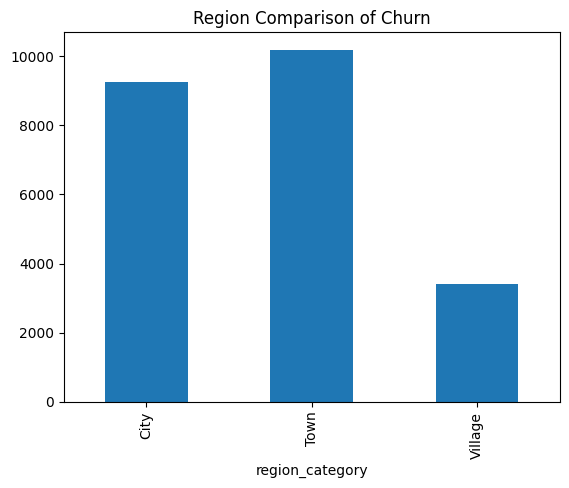

In [78]:
region_churn = df.groupby('region_category')['churn_risk_score'].count()
region_churn.plot(kind='bar',title= 'Region Comparison of Churn')

In [79]:
region_churn

region_category
City        9257
Town       10190
Village     3406
Name: churn_risk_score, dtype: int64

The churn condition for each region. As we know the most churn happened in town, it means that people in town has the biggest frequences of using company product.

Text(0.5, 1.0, 'Histogram of Age')

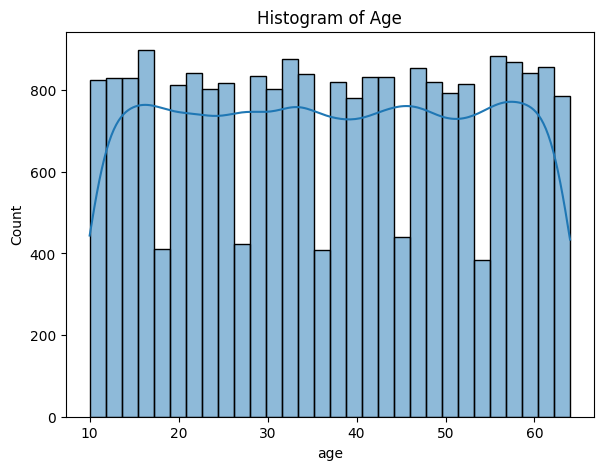

In [80]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['age'], kde=True, bins=30)
plt.title('Histogram of Age')



The distribution of 'age' looks normal. We should check for the next part.

<AxesSubplot:xlabel='gender', ylabel='points_in_wallet'>

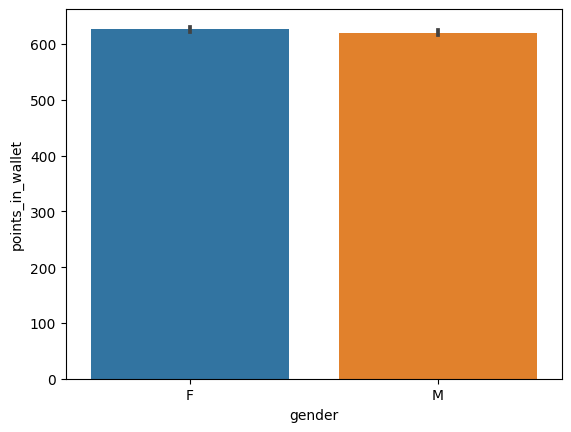

In [81]:
sns.barplot(data=df, x='gender', y='points_in_wallet')


Here is the comparison between gender and points_in_wallet. It has a normal balance distribution. 

<AxesSubplot:xlabel='churn_risk_score', ylabel='count'>

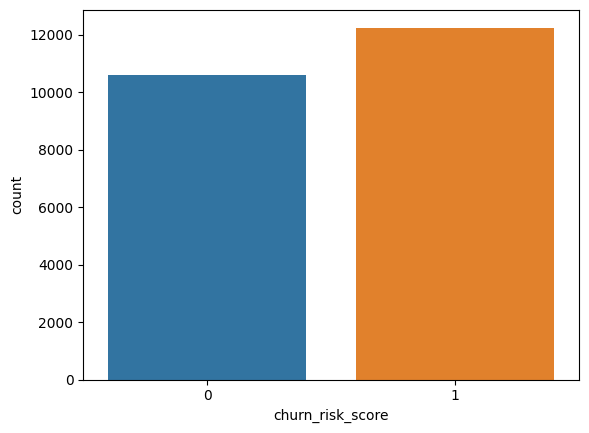

In [82]:
#looking for level of balancing income bracket 
sns.countplot(data=df,x='churn_risk_score')

Churn score has almost balance distribution.

In [83]:
# phik overview
import phik

interval columns not set, guessing: ['age', 'avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet', 'churn_risk_score']


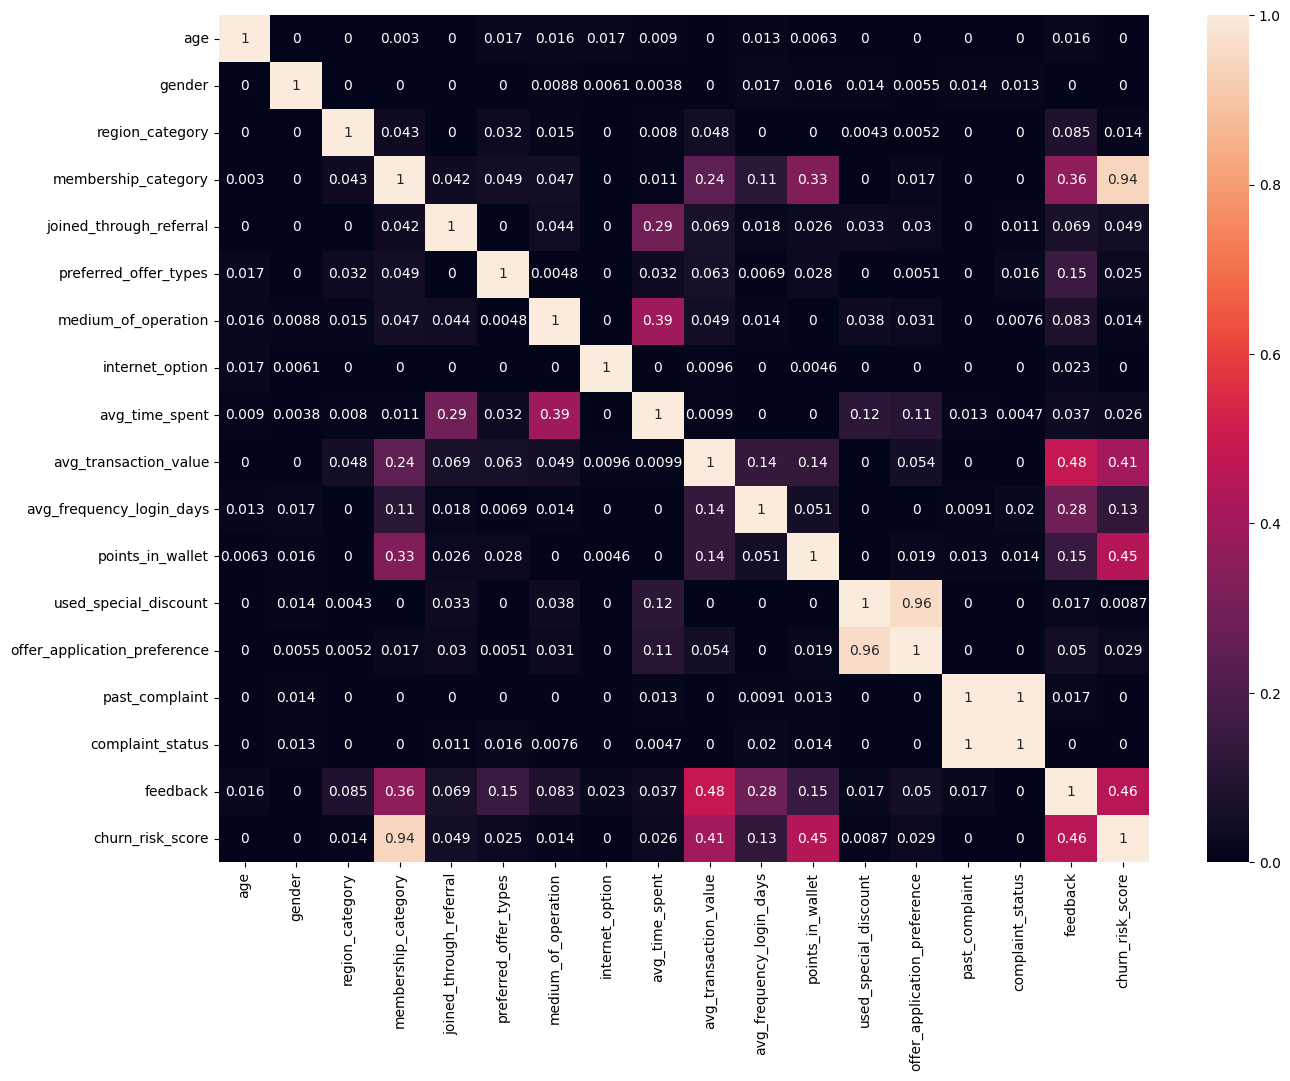

In [84]:
phik_corr = df.phik_matrix()
plt.figure(figsize=(15, 11))
sns.heatmap(phik_corr, annot= True,vmin=0, vmax=1)
plt.show()

From the phik score we can considered the correlation up and down from every feature. There were founded a few feature no correlation with the target label. But we should check it later. I considered to collecting each feature which has a good phik score to the target label. On the other hand, i should considered any features from the other judgement that can affected churn condition.

### Feature Engineering

For this step we should prepared all of the things before modelling process like splitting train set and test set, transformation, normalization, scaling, encoding, etc. 

In [85]:
df.columns.tolist()

['age',
 'gender',
 'region_category',
 'membership_category',
 'joined_through_referral',
 'preferred_offer_types',
 'medium_of_operation',
 'internet_option',
 'avg_time_spent',
 'avg_transaction_value',
 'avg_frequency_login_days',
 'points_in_wallet',
 'used_special_discount',
 'offer_application_preference',
 'past_complaint',
 'complaint_status',
 'feedback',
 'churn_risk_score']

### Feature Selection

In [86]:
df2 = df[['region_category','membership_category','joined_through_referral','medium_of_operation','avg_time_spent','avg_transaction_value','avg_frequency_login_days','points_in_wallet','feedback',
 'churn_risk_score']]

Here are the features that i have choosed.

In [87]:
df2.shape

(22853, 10)

In [88]:
df2 = df2.reset_index().drop('index',axis=1)
df2.head()

,region_category,membership_category,joined_through_referral,medium_of_operation,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,feedback,churn_risk_score
0,Village,No Membership,No,Desktop,56.67,15678.14,11.0,590.22000,Too many ads,1
1,City,No Membership,No,Smartphone,34.07,9151.14,29.0,655.43000,No reason specified,1
2,Town,Basic Membership,Yes,Desktop,106.23,28232.59,16.0,984.93392,Too many ads,1
3,Town,Platinum Membership,No,Desktop,74.38,23695.52,0.0,832.42000,Reasonable Price,0
4,City,Gold Membership,No,Desktop,31.39,76602.41,8.0,763.82000,Reasonable Price,0


Here is the dataset after selection

In [89]:
# df2.sample(100).to_csv('data_inference.csv')

saving data for inference

### Split between `X` (Features) and `y` (Target)

In [90]:
# Splitting between `X` and `y`

X = df2.drop(['churn_risk_score'], axis=1)
y = df2['churn_risk_score']
X

,region_category,membership_category,joined_through_referral,medium_of_operation,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,feedback
0,Village,No Membership,No,Desktop,56.67,15678.14,11.0,590.220000,Too many ads
1,City,No Membership,No,Smartphone,34.07,9151.14,29.0,655.430000,No reason specified
2,Town,Basic Membership,Yes,Desktop,106.23,28232.59,16.0,984.933920,Too many ads
3,Town,Platinum Membership,No,Desktop,74.38,23695.52,0.0,832.420000,Reasonable Price
4,City,Gold Membership,No,Desktop,31.39,76602.41,8.0,763.820000,Reasonable Price
...,...,...,...,...,...,...,...,...,...
22848,Town,No Membership,No,Smartphone,119.83,13147.91,0.0,1019.382051,Poor Product Quality
22849,Town,Basic Membership,Yes,Both,529.58,42964.11,18.0,619.280000,Poor Product Quality
22850,Town,Gold Membership,Yes,Smartphone,119.96,14218.43,7.0,781.840000,Too many ads
22851,City,Gold Membership,Yes,Desktop,368.50,27038.47,8.0,835.980000,Reasonable Price


### Split between cat and num

In [91]:
num_col2 = X.describe().columns.tolist()
cat_col2 = X.select_dtypes(include=['object']).columns.tolist()

### Split Train-Set, Test_set, and Val_set

In [92]:
# Splitting between Train-Set and Test-Set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, train_size=0.8, stratify=y_train)

print('Train Size : ', X_train.shape)
print('Val Size : ', X_val.shape)
print('Test Size  : ', X_test.shape)
X_train

Train Size :  (14625, 9)
Val Size :  (3657, 9)
Test Size  :  (4571, 9)


,region_category,membership_category,joined_through_referral,medium_of_operation,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,feedback
1563,Town,Gold Membership,Yes,Desktop,1321.356828,18631.43,0.000000,788.360000,Poor Customer Service
18339,City,Basic Membership,No,Desktop,33.930000,39800.00,7.000000,601.700000,Poor Customer Service
16064,Town,No Membership,Yes,Smartphone,75.970000,29486.47,27.000000,658.830000,Poor Product Quality
4632,City,Gold Membership,Yes,Desktop,138.130000,38580.62,5.000000,717.880000,Poor Website
2298,Village,Premium Membership,Yes,Desktop,499.550000,41105.24,46.443931,410.791101,Poor Website
...,...,...,...,...,...,...,...,...,...
10222,Town,Premium Membership,No,Smartphone,38.200000,3042.50,17.000000,1158.488848,Quality Customer Care
1051,City,Basic Membership,Yes,Desktop,1215.060000,2830.20,9.000000,717.380000,No reason specified
18729,Town,Premium Membership,Yes,Both,858.800000,6622.74,4.000000,845.820000,Products always in Stock
5310,City,Basic Membership,Yes,Smartphone,47.160000,13325.24,16.000000,656.280000,Too many ads


In [93]:
y_train.value_counts()

1    7837
0    6788
Name: churn_risk_score, dtype: int64

The target almost balanced

In [94]:
data_eda = pd.concat([X_train, y_train], axis=1)
data_eda.shape

(14625, 10)

In [95]:
X_train_eda = X_train.copy()

### Handling Outlier

In [96]:
# check skewness
for i in X_train_eda[num_col2].columns:
    print(i, ': ', X_train_eda[num_col2][i].skew())

avg_time_spent :  2.26968130837648
avg_transaction_value :  1.0252632264411983
avg_frequency_login_days :  0.39987539411136125
points_in_wallet :  -0.7658985454932167


In [97]:
# check outlier
winsor = Winsorizer(capping_method='iqr', fold=1.5, tail='both')
X_train_clean = winsor.fit_transform(X_train_eda)

In [98]:
for i in X_train_clean[num_col2].columns:
    print(i, ': ', X_train_clean[num_col2][i].skew())

avg_time_spent :  1.1411984010503045
avg_transaction_value :  0.7615350293312186
avg_frequency_login_days :  0.2328457950484398
points_in_wallet :  -0.34575789856217726


Skew scores still upnormal. Next we should scaled them.

In [99]:
X_train_clean[num_col2].isnull().sum()

avg_time_spent              0
avg_transaction_value       0
avg_frequency_login_days    0
points_in_wallet            0
dtype: int64

checking for mv

In [100]:
X_train_clean.describe()

,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet
count,14625.000000,14625.000000,14625.000000,14625.000000
mean,247.217993,28961.529240,14.668573,651.227608
std,238.284050,18601.712706,9.324099,184.597262
min,0.000000,800.460000,0.000000,304.935000
25%,59.400000,14224.220000,8.000000,576.780000
50%,161.600000,27442.070000,15.000000,681.500000
75%,352.120000,40863.540000,22.000000,758.010000
max,791.200000,80822.520000,43.000000,1029.855000


After mv handled

In [101]:
num_col2

['avg_time_spent',
 'avg_transaction_value',
 'avg_frequency_login_days',
 'points_in_wallet']

### Scaling

In [102]:
scaler = MinMaxScaler()

X_train_clean[num_col2] = scaler.fit_transform(X_train_clean[num_col2])
X_train_clean

,region_category,membership_category,joined_through_referral,medium_of_operation,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,feedback
1563,Town,Gold Membership,Yes,Desktop,1.000000,0.222826,0.000000,0.666867,Poor Customer Service
18339,City,Basic Membership,No,Desktop,0.042884,0.487360,0.162791,0.409376,Poor Customer Service
16064,Town,No Membership,Yes,Smartphone,0.096019,0.358476,0.627907,0.488185,Poor Product Quality
4632,City,Gold Membership,Yes,Desktop,0.174583,0.472122,0.116279,0.569642,Poor Website
2298,Village,Premium Membership,Yes,Desktop,0.631383,0.503671,1.000000,0.146025,Poor Website
...,...,...,...,...,...,...,...,...,...
10222,Town,Premium Membership,No,Smartphone,0.048281,0.028018,0.395349,1.000000,Quality Customer Care
1051,City,Basic Membership,Yes,Desktop,1.000000,0.025365,0.209302,0.568952,No reason specified
18729,Town,Premium Membership,Yes,Both,1.000000,0.072758,0.093023,0.746131,Products always in Stock
5310,City,Basic Membership,Yes,Smartphone,0.059606,0.156517,0.372093,0.484667,Too many ads


Scaling using MinMaxScaler for upnormal distribution

### Encoding

In [103]:
X_train_clean[cat_col2]

,region_category,membership_category,joined_through_referral,medium_of_operation,feedback
1563,Town,Gold Membership,Yes,Desktop,Poor Customer Service
18339,City,Basic Membership,No,Desktop,Poor Customer Service
16064,Town,No Membership,Yes,Smartphone,Poor Product Quality
4632,City,Gold Membership,Yes,Desktop,Poor Website
2298,Village,Premium Membership,Yes,Desktop,Poor Website
...,...,...,...,...,...
10222,Town,Premium Membership,No,Smartphone,Quality Customer Care
1051,City,Basic Membership,Yes,Desktop,No reason specified
18729,Town,Premium Membership,Yes,Both,Products always in Stock
5310,City,Basic Membership,Yes,Smartphone,Too many ads


In [104]:
enc = OrdinalEncoder()

cat_enc = pd.DataFrame(enc.fit_transform(X_train_clean[cat_col2]))
cat_enc.columns = cat_col2

review = pd.concat([X_train_clean[cat_col2].reset_index(drop=True), cat_enc], axis=1)

review.sample(5)

,region_category,membership_category,joined_through_referral,medium_of_operation,feedback,region_category,membership_category,joined_through_referral,medium_of_operation,feedback
5908,Town,Silver Membership,Yes,Desktop,Poor Customer Service,1.0,5.0,1.0,1.0,1.0
10356,Town,Basic Membership,No,Smartphone,Too many ads,1.0,0.0,0.0,2.0,7.0
2636,Town,Silver Membership,Yes,Smartphone,Too many ads,1.0,5.0,1.0,2.0,7.0
7527,City,No Membership,Yes,Desktop,Too many ads,0.0,2.0,1.0,1.0,7.0
3722,Village,Gold Membership,No,Smartphone,Poor Website,2.0,1.0,0.0,2.0,3.0


cat col has been encoded

In [105]:
y_train

1563     0
18339    1
16064    1
4632     1
2298     0
        ..
10222    0
1051     1
18729    0
5310     1
17967    1
Name: churn_risk_score, Length: 14625, dtype: int64

In [106]:
df_train_final = pd.concat([X_train_clean[num_col2].reset_index(drop=True), cat_enc, y_train.reset_index(drop=True)], axis=1)
df_train_final.shape

(14625, 10)

In [107]:
df_train_final.head()

,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,region_category,membership_category,joined_through_referral,medium_of_operation,feedback,churn_risk_score
0,1.000000,0.222826,0.000000,0.666867,1.0,1.0,1.0,1.0,1.0,0
1,0.042884,0.487360,0.162791,0.409376,0.0,0.0,0.0,1.0,1.0,1
2,0.096019,0.358476,0.627907,0.488185,1.0,2.0,1.0,2.0,2.0,1
3,0.174583,0.472122,0.116279,0.569642,0.0,1.0,1.0,1.0,3.0,1
4,0.631383,0.503671,1.000000,0.146025,2.0,4.0,1.0,1.0,3.0,0


### VIF  

In [108]:
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [109]:
calc_vif(df_train_final)

,variables,VIF
0,avg_time_spent,2.112689
1,avg_transaction_value,3.196257
2,avg_frequency_login_days,3.164651
3,points_in_wallet,4.050214
4,region_category,2.061178
5,membership_category,2.896880
6,joined_through_referral,2.011604
7,medium_of_operation,4.111284
8,feedback,2.470240
9,churn_risk_score,2.276425


looking to vif scores for consideration. From this we know that every features has a right vif scores, which has score under 10.

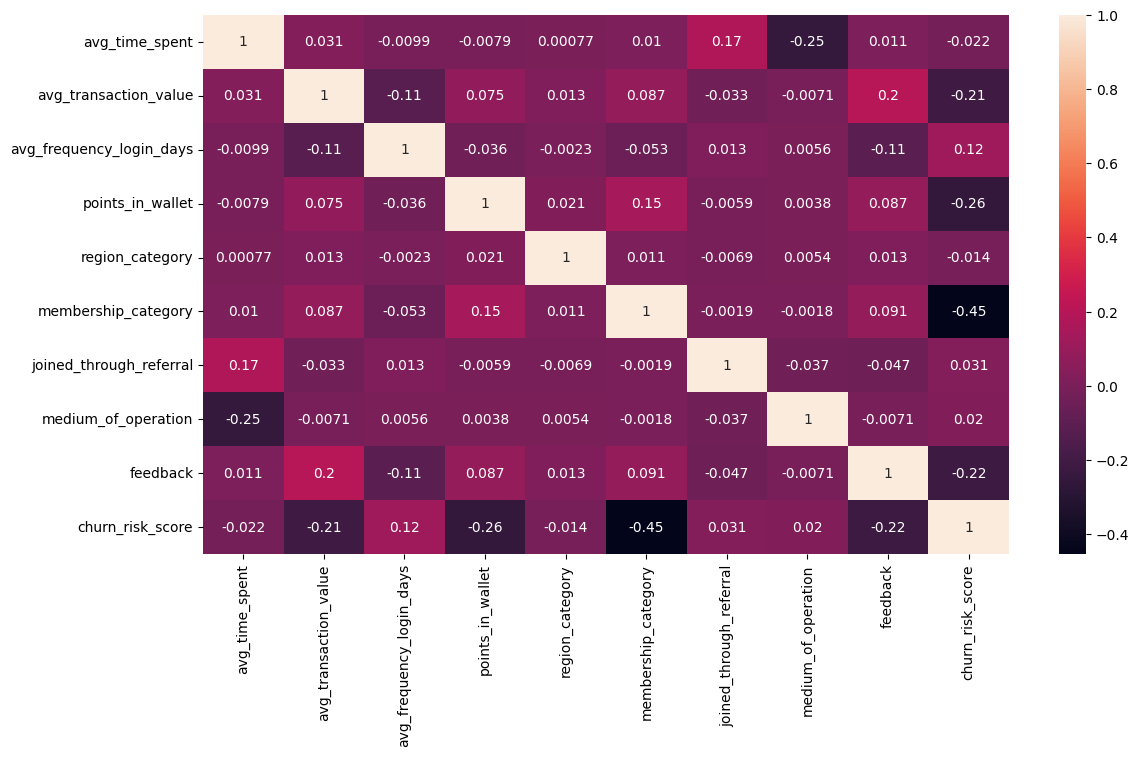

In [110]:
# pearson correlation for x_train_final

fig,ax = plt.subplots(figsize=[13,7])

corr = df_train_final.corr()

ax = sns.heatmap(corr,annot=True)
plt.show()

List of action :  
1. numerical : 
    - outlier handled (winsorizer)
    - scaling using MinMaxScaler
2. categorical :
    - encoding using ordinal encoder for all of categorical column

### Pipeline Preprocess

In [111]:
num_pipe = Pipeline([
        ('outlier', Winsorizer(capping_method='iqr', fold=3, tail='both')),
        ('scaler', MinMaxScaler())
    ])

num_tr = num_pipe.fit_transform(X_train[num_col2])
num_tr

array([[1.        , 0.17990439, 0.        , 0.59535239],
       [0.02757909, 0.39348328, 0.109375  , 0.44821498],
       [0.06175017, 0.2894256 , 0.421875  , 0.49324852],
       ...,
       [0.69805248, 0.05874351, 0.0625    , 0.64064606],
       [0.03833274, 0.12636794, 0.25      , 0.49123844],
       [0.22329063, 0.02268165, 0.09375   , 0.49834859]])

In [112]:
cat_pipe = Pipeline([
    ('encoder', OrdinalEncoder())
    ])

cat_tr = cat_pipe.fit_transform(X_train[cat_col2])
cat_tr

array([[1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1.],
       [1., 2., 1., 2., 2.],
       ...,
       [1., 4., 1., 0., 4.],
       [0., 0., 1., 2., 7.],
       [1., 2., 1., 0., 0.]])

In [113]:
pipe_preprocess = ColumnTransformer([
    ('pipe_1', num_pipe,num_col2),
    ('pipe_2', cat_pipe,cat_col2)
])

train_tr = pipe_preprocess.fit_transform(X_train)
train_tr

array([[1.        , 0.17990439, 0.        , ..., 1.        , 1.        ,
        1.        ],
       [0.02757909, 0.39348328, 0.109375  , ..., 0.        , 1.        ,
        1.        ],
       [0.06175017, 0.2894256 , 0.421875  , ..., 1.        , 2.        ,
        2.        ],
       ...,
       [0.69805248, 0.05874351, 0.0625    , ..., 1.        , 0.        ,
        4.        ],
       [0.03833274, 0.12636794, 0.25      , ..., 1.        , 2.        ,
        7.        ],
       [0.22329063, 0.02268165, 0.09375   , ..., 1.        , 0.        ,
        0.        ]])

In [114]:
val_tr = pipe_preprocess.fit_transform(X_val)
val_tr

array([[0.04414969, 0.43525243, 0.25985506, ..., 0.        , 1.        ,
        2.        ],
       [0.95060496, 0.12144139, 0.46402689, ..., 1.        , 1.        ,
        2.        ],
       [0.50627937, 0.47705046, 0.40834366, ..., 1.        , 0.        ,
        1.        ],
       ...,
       [0.05895869, 0.19354618, 0.33409936, ..., 1.        , 2.        ,
        3.        ],
       [0.20178754, 0.23093824, 0.27841613, ..., 1.        , 1.        ,
        2.        ],
       [0.16514932, 0.32494808, 0.37122151, ..., 0.        , 1.        ,
        0.        ]])

In [115]:
test_tr = pipe_preprocess.transform(X_test)
test_tr

array([[0.02621091, 0.30105047, 0.22273291, ..., 0.        , 2.        ,
        8.        ],
       [0.1522261 , 0.25003838, 0.50114904, ..., 0.        , 1.        ,
        0.        ],
       [0.07941715, 0.48923866, 0.29697721, ..., 1.        , 1.        ,
        1.        ],
       ...,
       [0.20204109, 0.05206781, 0.22273291, ..., 0.        , 1.        ,
        0.        ],
       [0.17102855, 0.10029362, 0.38978259, ..., 0.        , 1.        ,
        0.        ],
       [0.03055298, 0.16085001, 0.51971012, ..., 1.        , 2.        ,
        3.        ]])

### Model Definition

### Tensorflow Pipeline

In [116]:
#train
train_dataset = tf.data.Dataset.from_tensor_slices((train_tr, y_train))

In [117]:
train_dataset = train_dataset.shuffle(buffer_size=500).batch(64)

In [118]:
#val
val_dataset = tf.data.Dataset.from_tensor_slices((val_tr, y_val))
val_dataset = val_dataset.batch(64)

In [119]:
#test
test_dataset = tf.data.Dataset.from_tensor_slices((test_tr, y_test))
test_dataset = test_dataset.batch(64)

### Sequential

In [120]:
train_tr.shape[1:]

(9,)

In [121]:
alp = 10
inp = X_train.shape[1]
out = 1
hid = int(len(X_train)/(alp*(inp+out)))
print(f'neuron at hidden layer: {hid}')

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(inp, activation='relu', input_shape=(inp,)),
    tf.keras.layers.Dense(hid, activation='relu'),
    tf.keras.layers.Dense(out, activation='sigmoid')
])


model.summary()

neuron at hidden layer: 146
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 9)                 90        
_________________________________________________________________
dense_13 (Dense)             (None, 146)               1460      
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 147       
Total params: 1,697
Trainable params: 1,697
Non-trainable params: 0
_________________________________________________________________


I considered for define my sequential models into 9 input layers, 146 hidden layers and 1 output layer. For this model, i have concerned to taking of a sample for my data around 90 percent. So base on the code my data train was divided by alpha 0.1 which multiplied by in + out layers. Finally, i got 146 layers. 

In [123]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [186]:
callback1 = [ 
    EarlyStopping(monitor = 'val_loss', patience = 3, restore_best_weights=True), 
    ModelCheckpoint('model_best.hdf5', monitor='val_loss', save_best_only=True)
]

I set the callbacks to preventing the over training epochs. So i will get the best epochs as we planned before.

In [127]:
history = model.fit(train_dataset, epochs=100, validation_data=val_dataset,callbacks=callback1)

Epoch 1/100
    229/Unknown - 2s 11ms/step - loss: 0.2672 - accuracy: 0.8632

2023-05-31 17:01:49.671101: W tensorflow/core/common_runtime/base_collective_executor.cc:216] BaseCollectiveExecutor::StartAbort Out of range: End of sequence
	 [[{{node IteratorGetNext}}]]


229/229 [==============================] - 3s 12ms/step - loss: 0.2672 - accuracy: 0.8632 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/100
224/229 [============================>.] - ETA: 0s - loss: 0.2670 - accuracy: 0.8613

2023-05-31 17:01:51.055185: W tensorflow/core/common_runtime/base_collective_executor.cc:216] BaseCollectiveExecutor::StartAbort Out of range: End of sequence
	 [[{{node IteratorGetNext}}]]


229/229 [==============================] - 1s 6ms/step - loss: 0.2675 - accuracy: 0.8607 - val_loss: 0.2661 - val_accuracy: 0.8594
Epoch 3/100
229/229 [==============================] - 1s 6ms/step - loss: 0.2674 - accuracy: 0.8604 - val_loss: 0.2629 - val_accuracy: 0.8663
Epoch 4/100
  1/229 [..............................] - ETA: 4s - loss: 0.2804 - accuracy: 0.8438

2023-05-31 17:01:52.502191: W tensorflow/core/common_runtime/base_collective_executor.cc:216] BaseCollectiveExecutor::StartAbort Out of range: End of sequence
	 [[{{node IteratorGetNext}}]]


229/229 [==============================] - 1s 6ms/step - loss: 0.2660 - accuracy: 0.8643 - val_loss: 0.2654 - val_accuracy: 0.8586
Epoch 5/100
  1/229 [..............................] - ETA: 4s - loss: 0.2455 - accuracy: 0.8438

2023-05-31 17:01:53.927023: W tensorflow/core/common_runtime/base_collective_executor.cc:216] BaseCollectiveExecutor::StartAbort Out of range: End of sequence
	 [[{{node IteratorGetNext}}]]


229/229 [==============================] - 1s 6ms/step - loss: 0.2669 - accuracy: 0.8628 - val_loss: 0.2639 - val_accuracy: 0.8551
Epoch 6/100
  1/229 [..............................] - ETA: 4s - loss: 0.3083 - accuracy: 0.8438

2023-05-31 17:01:55.243065: W tensorflow/core/common_runtime/base_collective_executor.cc:216] BaseCollectiveExecutor::StartAbort Out of range: End of sequence
	 [[{{node IteratorGetNext}}]]


229/229 [==============================] - 2s 7ms/step - loss: 0.2657 - accuracy: 0.8642 - val_loss: 0.2611 - val_accuracy: 0.8622
Epoch 7/100
  1/229 [..............................] - ETA: 4s - loss: 0.1733 - accuracy: 0.8750

2023-05-31 17:01:56.740757: W tensorflow/core/common_runtime/base_collective_executor.cc:216] BaseCollectiveExecutor::StartAbort Out of range: End of sequence
	 [[{{node IteratorGetNext}}]]


229/229 [==============================] - 1s 6ms/step - loss: 0.2652 - accuracy: 0.8619 - val_loss: 0.2617 - val_accuracy: 0.8625
Epoch 8/100
  1/229 [..............................] - ETA: 4s - loss: 0.2640 - accuracy: 0.8594

2023-05-31 17:01:58.115650: W tensorflow/core/common_runtime/base_collective_executor.cc:216] BaseCollectiveExecutor::StartAbort Out of range: End of sequence
	 [[{{node IteratorGetNext}}]]


229/229 [==============================] - 1s 6ms/step - loss: 0.2657 - accuracy: 0.8635 - val_loss: 0.2710 - val_accuracy: 0.8589
Epoch 9/100
  1/229 [..............................] - ETA: 5s - loss: 0.1789 - accuracy: 0.8906

2023-05-31 17:01:59.503869: W tensorflow/core/common_runtime/base_collective_executor.cc:216] BaseCollectiveExecutor::StartAbort Out of range: End of sequence
	 [[{{node IteratorGetNext}}]]


229/229 [==============================] - 1s 6ms/step - loss: 0.2668 - accuracy: 0.8640 - val_loss: 0.2634 - val_accuracy: 0.8657


2023-05-31 17:02:00.878030: W tensorflow/core/common_runtime/base_collective_executor.cc:216] BaseCollectiveExecutor::StartAbort Out of range: End of sequence
	 [[{{node IteratorGetNext}}]]


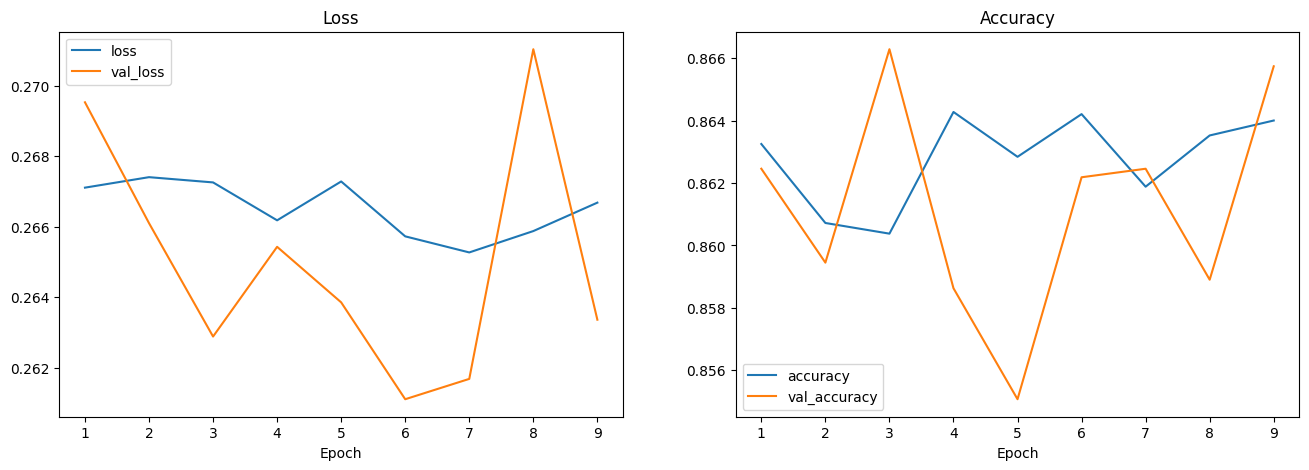

In [128]:
epoch=9

fig, ax = plt.subplots(ncols=2,figsize=(16,5))
ax[0].plot(range(1,epoch+1),history.history['loss'],label='loss')
ax[0].plot(range(1,epoch+1),history.history['val_loss'],label='val_loss')
ax[0].set_title('Loss')
ax[0].legend()
ax[0].set_xlabel('Epoch')
#ax[0].set_ylim(0,0.01)

ax[1].plot(range(1,epoch+1),history.history['accuracy'],label='accuracy')
ax[1].plot(range(1,epoch+1),history.history['val_accuracy'],label='val_accuracy')
ax[1].set_title('Accuracy')
ax[1].legend()
ax[1].set_xlabel('Epoch')
#ax[1].set_ylim(0.5,1.5)

plt.show()

From this visualization this base sequential model already give the good result. There is a little bit gradient problem 

In [146]:
#  Sequential base evaluation
print("Evaluate on test data")
results = model.evaluate(test_dataset)
print('Test - Loss     : ', results[0])
print('Test - Accuracy : ', results[1])
print('')

Evaluate on test data
72/72 [==============================] - 0s 4ms/step - loss: 0.2678 - accuracy: 0.8600
Test - Loss     :  0.2677961041529973
Test - Accuracy :  0.8599869



### Functional

In [136]:

input_layer = tf.keras.Input(shape = (X_train.shape[1:]), name = "input_layer") 

hidden_1 = tf.keras.layers.Dense(9, activation ="relu", name = "hidden_1" )(input_layer)
hidden_2 = tf.keras.layers.Dense(40, activation ="relu", name = "hidden_2" )(hidden_1) 
hidden_3 = tf.keras.layers.Dense(10, activation ="relu", name = "hidden_3" )(hidden_2)
concat = tf.keras.layers.concatenate([input_layer, hidden_3])

output_layer = tf.keras.layers.Dense(1,activation = "sigmoid",  name = "output_layer" )(concat)

model_func = tf.keras.Model(inputs = input_layer, 
                   outputs = output_layer)

model_func.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

From this architecture i decided to build with those layer based on my trial and error.

In [137]:
model_func.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_layer (InputLayer)        [(None, 9)]          0                                            
__________________________________________________________________________________________________
hidden_1 (Dense)                (None, 9)            90          input_layer[0][0]                
__________________________________________________________________________________________________
hidden_2 (Dense)                (None, 40)           400         hidden_1[0][0]                   
__________________________________________________________________________________________________
hidden_3 (Dense)                (None, 10)           410         hidden_2[0][0]                   
____________________________________________________________________________________________

In [185]:
callbacks2= [
    EarlyStopping(monitor='val_loss', patience= 3, restore_best_weights=True),
    ModelCheckpoint('model_best_func.hdf5', monitor='val_loss', save_best_only=True)
]

In [187]:
history2 = model_func.fit(train_dataset,epochs=100, validation_data=val_dataset,callbacks=callbacks2)

Epoch 1/100
    229/Unknown - 9s 37ms/step - loss: 0.5922 - accuracy: 0.6898

2023-05-31 18:56:00.207611: W tensorflow/core/common_runtime/base_collective_executor.cc:216] BaseCollectiveExecutor::StartAbort Out of range: End of sequence
	 [[{{node IteratorGetNext}}]]


229/229 [==============================] - 9s 40ms/step - loss: 0.5922 - accuracy: 0.6898 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/100
226/229 [============================>.] - ETA: 0s - loss: 0.4561 - accuracy: 0.7884

2023-05-31 18:56:03.272521: W tensorflow/core/common_runtime/base_collective_executor.cc:216] BaseCollectiveExecutor::StartAbort Out of range: End of sequence
	 [[{{node IteratorGetNext}}]]


229/229 [==============================] - 3s 12ms/step - loss: 0.4550 - accuracy: 0.7894 - val_loss: 0.4167 - val_accuracy: 0.8236
Epoch 3/100
228/229 [============================>.] - ETA: 0s - loss: 0.3689 - accuracy: 0.8355

2023-05-31 18:56:05.996552: W tensorflow/core/common_runtime/base_collective_executor.cc:216] BaseCollectiveExecutor::StartAbort Out of range: End of sequence
	 [[{{node IteratorGetNext}}]]


229/229 [==============================] - 3s 12ms/step - loss: 0.3689 - accuracy: 0.8356 - val_loss: 0.3266 - val_accuracy: 0.8452
Epoch 4/100
226/229 [============================>.] - ETA: 0s - loss: 0.3319 - accuracy: 0.8399

2023-05-31 18:56:08.539315: W tensorflow/core/common_runtime/base_collective_executor.cc:216] BaseCollectiveExecutor::StartAbort Out of range: End of sequence
	 [[{{node IteratorGetNext}}]]


229/229 [==============================] - 3s 11ms/step - loss: 0.3314 - accuracy: 0.8405 - val_loss: 0.3020 - val_accuracy: 0.8496
Epoch 5/100
224/229 [============================>.] - ETA: 0s - loss: 0.3129 - accuracy: 0.8469

2023-05-31 18:56:11.088835: W tensorflow/core/common_runtime/base_collective_executor.cc:216] BaseCollectiveExecutor::StartAbort Out of range: End of sequence
	 [[{{node IteratorGetNext}}]]


229/229 [==============================] - 3s 11ms/step - loss: 0.3127 - accuracy: 0.8469 - val_loss: 0.2869 - val_accuracy: 0.8491
Epoch 6/100
228/229 [============================>.] - ETA: 0s - loss: 0.3085 - accuracy: 0.8464

2023-05-31 18:56:13.703220: W tensorflow/core/common_runtime/base_collective_executor.cc:216] BaseCollectiveExecutor::StartAbort Out of range: End of sequence
	 [[{{node IteratorGetNext}}]]


229/229 [==============================] - 3s 12ms/step - loss: 0.3085 - accuracy: 0.8456 - val_loss: 0.2832 - val_accuracy: 0.8564
Epoch 7/100
227/229 [============================>.] - ETA: 0s - loss: 0.3044 - accuracy: 0.8487

2023-05-31 18:56:16.356222: W tensorflow/core/common_runtime/base_collective_executor.cc:216] BaseCollectiveExecutor::StartAbort Out of range: End of sequence
	 [[{{node IteratorGetNext}}]]


229/229 [==============================] - 3s 12ms/step - loss: 0.3045 - accuracy: 0.8486 - val_loss: 0.2809 - val_accuracy: 0.8562
Epoch 8/100
229/229 [==============================] - 2s 11ms/step - loss: 0.2968 - accuracy: 0.8504 - val_loss: 0.3037 - val_accuracy: 0.8417
Epoch 9/100
  1/229 [..............................] - ETA: 4s - loss: 0.2639 - accuracy: 0.8750

2023-05-31 18:56:18.942609: W tensorflow/core/common_runtime/base_collective_executor.cc:216] BaseCollectiveExecutor::StartAbort Out of range: End of sequence
	 [[{{node IteratorGetNext}}]]


229/229 [==============================] - 3s 11ms/step - loss: 0.2974 - accuracy: 0.8487 - val_loss: 0.2851 - val_accuracy: 0.8474
Epoch 10/100
  1/229 [..............................] - ETA: 4s - loss: 0.2811 - accuracy: 0.8750

2023-05-31 18:56:21.453797: W tensorflow/core/common_runtime/base_collective_executor.cc:216] BaseCollectiveExecutor::StartAbort Out of range: End of sequence
	 [[{{node IteratorGetNext}}]]


224/229 [============================>.] - ETA: 0s - loss: 0.2949 - accuracy: 0.8544

2023-05-31 18:56:24.495418: W tensorflow/core/common_runtime/base_collective_executor.cc:216] BaseCollectiveExecutor::StartAbort Out of range: End of sequence
	 [[{{node IteratorGetNext}}]]


229/229 [==============================] - 3s 14ms/step - loss: 0.2952 - accuracy: 0.8540 - val_loss: 0.2778 - val_accuracy: 0.8537
Epoch 11/100
228/229 [============================>.] - ETA: 0s - loss: 0.2958 - accuracy: 0.8506

2023-05-31 18:56:27.254556: W tensorflow/core/common_runtime/base_collective_executor.cc:216] BaseCollectiveExecutor::StartAbort Out of range: End of sequence
	 [[{{node IteratorGetNext}}]]


229/229 [==============================] - 3s 12ms/step - loss: 0.2958 - accuracy: 0.8505 - val_loss: 0.2730 - val_accuracy: 0.8578
Epoch 12/100
229/229 [==============================] - 3s 11ms/step - loss: 0.2911 - accuracy: 0.8493 - val_loss: 0.2790 - val_accuracy: 0.8477


2023-05-31 18:56:29.895529: W tensorflow/core/common_runtime/base_collective_executor.cc:216] BaseCollectiveExecutor::StartAbort Out of range: End of sequence
	 [[{{node IteratorGetNext}}]]


Epoch 13/100
226/229 [============================>.] - ETA: 0s - loss: 0.2891 - accuracy: 0.8540

2023-05-31 18:56:34.831693: W tensorflow/core/common_runtime/base_collective_executor.cc:216] BaseCollectiveExecutor::StartAbort Out of range: End of sequence
	 [[{{node IteratorGetNext}}]]


229/229 [==============================] - 5s 23ms/step - loss: 0.2887 - accuracy: 0.8542 - val_loss: 0.2769 - val_accuracy: 0.8502
Epoch 14/100
225/229 [============================>.] - ETA: 0s - loss: 0.2916 - accuracy: 0.8512

2023-05-31 18:56:39.537237: W tensorflow/core/common_runtime/base_collective_executor.cc:216] BaseCollectiveExecutor::StartAbort Out of range: End of sequence
	 [[{{node IteratorGetNext}}]]


229/229 [==============================] - 5s 20ms/step - loss: 0.2906 - accuracy: 0.8518 - val_loss: 0.2801 - val_accuracy: 0.8526


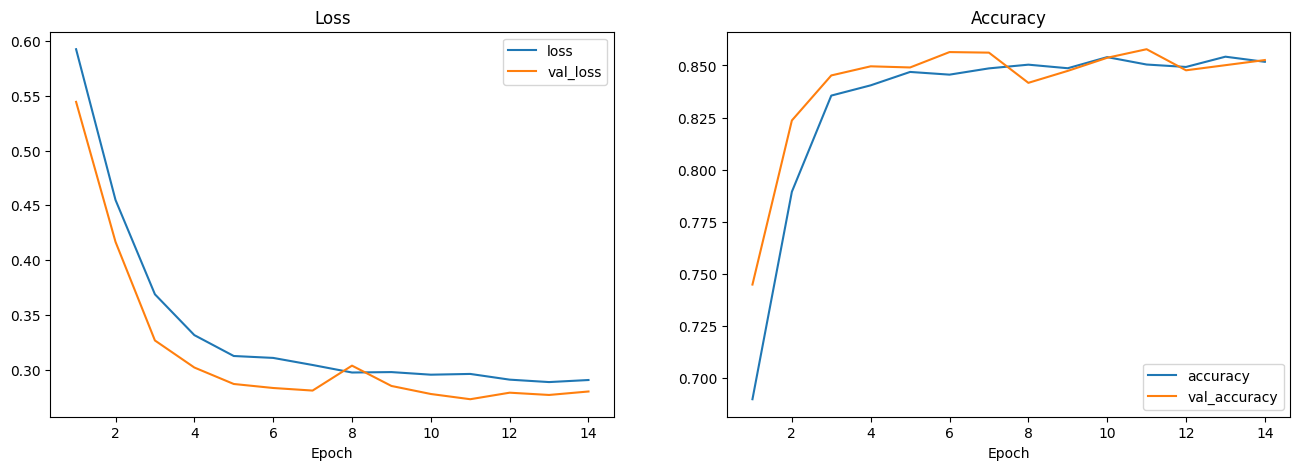

In [188]:
epoch = 14  # Replace with the actual number of epochs

fig, ax = plt.subplots(ncols=2, figsize=(16, 5))
ax[0].plot(range(1, epoch + 1), history2.history['loss'], label='loss')
ax[0].plot(range(1, epoch + 1), history2.history['val_loss'], label='val_loss')
ax[0].set_title('Loss')
ax[0].legend()
ax[0].set_xlabel('Epoch')
# ax[0].set_ylim(0,0.01)

ax[1].plot(range(1, epoch + 1), history2.history['accuracy'], label='accuracy')
ax[1].plot(range(1, epoch + 1), history2.history['val_accuracy'], label='val_accuracy')
ax[1].set_title('Accuracy')
ax[1].legend()
ax[1].set_xlabel('Epoch')
# ax[1].set_ylim(0.5, 1.5)

plt.show()

Here are the loss and accuracy graphic. it stopped at 14 epochs

In [189]:
# Functional base evaluation
print("Evaluate on test data")
results_func = model_func.evaluate(test_dataset)
print('Test - Loss     : ', results_func[0])
print('Test - Accuracy : ', results_func[1])
print('')

Evaluate on test data
72/72 [==============================] - 0s 4ms/step - loss: 0.2804 - accuracy: 0.8506
Test - Loss     :  0.28036767948004937
Test - Accuracy :  0.85057974



### Model Improvement

### Sequential

In [178]:
from tensorflow.keras import regularizers

model_improve = tf.keras.models.Sequential([
    tf.keras.layers.Dense(inp, activation='relu', input_shape=(inp,),
                          kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.Dense(hid, activation='relu',
                          kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.Dense(out, activation='sigmoid')
])

From this sequential improvement i have concerned to added the kernel reguralization.

In [179]:
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001)
model_improve.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

Then i considered to change optimizer into RMSprop with 0.001 learning rate.

In [180]:
history_improve = model_improve.fit(train_dataset, epochs=100, validation_data=val_dataset,callbacks=callback1)

Epoch 1/100
    229/Unknown - 4s 17ms/step - loss: 0.7082 - accuracy: 0.7161

2023-05-31 18:44:59.280946: W tensorflow/core/common_runtime/base_collective_executor.cc:216] BaseCollectiveExecutor::StartAbort Out of range: End of sequence
	 [[{{node IteratorGetNext}}]]


229/229 [==============================] - 5s 22ms/step - loss: 0.7082 - accuracy: 0.7161 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/100
229/229 [==============================] - 1s 5ms/step - loss: 0.5994 - accuracy: 0.7496 - val_loss: 0.5649 - val_accuracy: 0.7706
Epoch 3/100
 12/229 [>.............................] - ETA: 1s - loss: 0.6135 - accuracy: 0.7240

2023-05-31 18:45:01.470184: W tensorflow/core/common_runtime/base_collective_executor.cc:216] BaseCollectiveExecutor::StartAbort Out of range: End of sequence
	 [[{{node IteratorGetNext}}]]


229/229 [==============================] - 1s 6ms/step - loss: 0.5714 - accuracy: 0.7585 - val_loss: 0.5469 - val_accuracy: 0.7722
Epoch 4/100
  9/229 [>.............................] - ETA: 1s - loss: 0.5618 - accuracy: 0.7535

2023-05-31 18:45:02.811922: W tensorflow/core/common_runtime/base_collective_executor.cc:216] BaseCollectiveExecutor::StartAbort Out of range: End of sequence
	 [[{{node IteratorGetNext}}]]


229/229 [==============================] - 1s 5ms/step - loss: 0.5586 - accuracy: 0.7608 - val_loss: 0.5448 - val_accuracy: 0.7687
Epoch 5/100
 10/229 [>.............................] - ETA: 1s - loss: 0.5783 - accuracy: 0.7359

2023-05-31 18:45:04.056058: W tensorflow/core/common_runtime/base_collective_executor.cc:216] BaseCollectiveExecutor::StartAbort Out of range: End of sequence
	 [[{{node IteratorGetNext}}]]


229/229 [==============================] - 1s 6ms/step - loss: 0.5516 - accuracy: 0.7624 - val_loss: 0.5318 - val_accuracy: 0.7758
Epoch 6/100
  1/229 [..............................] - ETA: 3s - loss: 0.5710 - accuracy: 0.7812

2023-05-31 18:45:05.407168: W tensorflow/core/common_runtime/base_collective_executor.cc:216] BaseCollectiveExecutor::StartAbort Out of range: End of sequence
	 [[{{node IteratorGetNext}}]]


226/229 [============================>.] - ETA: 0s - loss: 0.5444 - accuracy: 0.7682

2023-05-31 18:45:06.991158: W tensorflow/core/common_runtime/base_collective_executor.cc:216] BaseCollectiveExecutor::StartAbort Out of range: End of sequence
	 [[{{node IteratorGetNext}}]]


229/229 [==============================] - 2s 7ms/step - loss: 0.5449 - accuracy: 0.7675 - val_loss: 0.5255 - val_accuracy: 0.7829
Epoch 7/100
226/229 [============================>.] - ETA: 0s - loss: 0.5362 - accuracy: 0.7785

2023-05-31 18:45:08.847559: W tensorflow/core/common_runtime/base_collective_executor.cc:216] BaseCollectiveExecutor::StartAbort Out of range: End of sequence
	 [[{{node IteratorGetNext}}]]


229/229 [==============================] - 2s 8ms/step - loss: 0.5363 - accuracy: 0.7788 - val_loss: 0.5221 - val_accuracy: 0.7829
Epoch 8/100
229/229 [==============================] - 2s 8ms/step - loss: 0.5292 - accuracy: 0.7849 - val_loss: 0.5097 - val_accuracy: 0.8031
Epoch 9/100
  1/229 [..............................] - ETA: 4s - loss: 0.4678 - accuracy: 0.8125

2023-05-31 18:45:10.657655: W tensorflow/core/common_runtime/base_collective_executor.cc:216] BaseCollectiveExecutor::StartAbort Out of range: End of sequence
	 [[{{node IteratorGetNext}}]]


229/229 [==============================] - 2s 8ms/step - loss: 0.5208 - accuracy: 0.7896 - val_loss: 0.5018 - val_accuracy: 0.8004
Epoch 10/100


2023-05-31 18:45:12.577663: W tensorflow/core/common_runtime/base_collective_executor.cc:216] BaseCollectiveExecutor::StartAbort Out of range: End of sequence
	 [[{{node IteratorGetNext}}]]


226/229 [============================>.] - ETA: 0s - loss: 0.5105 - accuracy: 0.7961

2023-05-31 18:45:14.548973: W tensorflow/core/common_runtime/base_collective_executor.cc:216] BaseCollectiveExecutor::StartAbort Out of range: End of sequence
	 [[{{node IteratorGetNext}}]]


229/229 [==============================] - 2s 9ms/step - loss: 0.5104 - accuracy: 0.7960 - val_loss: 0.4978 - val_accuracy: 0.7993
Epoch 11/100
229/229 [==============================] - 2s 8ms/step - loss: 0.4979 - accuracy: 0.8040 - val_loss: 0.4753 - val_accuracy: 0.8264
Epoch 12/100
  1/229 [..............................] - ETA: 4s - loss: 0.4961 - accuracy: 0.7969

2023-05-31 18:45:16.555612: W tensorflow/core/common_runtime/base_collective_executor.cc:216] BaseCollectiveExecutor::StartAbort Out of range: End of sequence
	 [[{{node IteratorGetNext}}]]


226/229 [============================>.] - ETA: 0s - loss: 0.4835 - accuracy: 0.8105

2023-05-31 18:45:18.067518: W tensorflow/core/common_runtime/base_collective_executor.cc:216] BaseCollectiveExecutor::StartAbort Out of range: End of sequence
	 [[{{node IteratorGetNext}}]]


229/229 [==============================] - 2s 7ms/step - loss: 0.4835 - accuracy: 0.8101 - val_loss: 0.4740 - val_accuracy: 0.8193
Epoch 13/100
229/229 [==============================] - 2s 7ms/step - loss: 0.4685 - accuracy: 0.8152 - val_loss: 0.4641 - val_accuracy: 0.8190
Epoch 14/100
  1/229 [..............................] - ETA: 4s - loss: 0.4679 - accuracy: 0.8438

2023-05-31 18:45:19.690673: W tensorflow/core/common_runtime/base_collective_executor.cc:216] BaseCollectiveExecutor::StartAbort Out of range: End of sequence
	 [[{{node IteratorGetNext}}]]


222/229 [============================>.] - ETA: 0s - loss: 0.4519 - accuracy: 0.8224

2023-05-31 18:45:21.103115: W tensorflow/core/common_runtime/base_collective_executor.cc:216] BaseCollectiveExecutor::StartAbort Out of range: End of sequence
	 [[{{node IteratorGetNext}}]]


229/229 [==============================] - 2s 7ms/step - loss: 0.4523 - accuracy: 0.8219 - val_loss: 0.4583 - val_accuracy: 0.8176
Epoch 15/100
229/229 [==============================] - 2s 8ms/step - loss: 0.4361 - accuracy: 0.8272 - val_loss: 0.4282 - val_accuracy: 0.8395
Epoch 16/100
  1/229 [..............................] - ETA: 3s - loss: 0.4059 - accuracy: 0.8594

2023-05-31 18:45:23.006466: W tensorflow/core/common_runtime/base_collective_executor.cc:216] BaseCollectiveExecutor::StartAbort Out of range: End of sequence
	 [[{{node IteratorGetNext}}]]


224/229 [============================>.] - ETA: 0s - loss: 0.4224 - accuracy: 0.8353

2023-05-31 18:45:24.895995: W tensorflow/core/common_runtime/base_collective_executor.cc:216] BaseCollectiveExecutor::StartAbort Out of range: End of sequence
	 [[{{node IteratorGetNext}}]]


229/229 [==============================] - 2s 9ms/step - loss: 0.4223 - accuracy: 0.8356 - val_loss: 0.4308 - val_accuracy: 0.8378
Epoch 17/100
229/229 [==============================] - 2s 9ms/step - loss: 0.4052 - accuracy: 0.8418 - val_loss: 0.3963 - val_accuracy: 0.8512
Epoch 18/100
  1/229 [..............................] - ETA: 5s - loss: 0.3968 - accuracy: 0.8438

2023-05-31 18:45:27.124679: W tensorflow/core/common_runtime/base_collective_executor.cc:216] BaseCollectiveExecutor::StartAbort Out of range: End of sequence
	 [[{{node IteratorGetNext}}]]


225/229 [============================>.] - ETA: 0s - loss: 0.3892 - accuracy: 0.8467 ETA: 0s - loss: 0.3888 - accuracy

2023-05-31 18:45:29.147293: W tensorflow/core/common_runtime/base_collective_executor.cc:216] BaseCollectiveExecutor::StartAbort Out of range: End of sequence
	 [[{{node IteratorGetNext}}]]


229/229 [==============================] - 2s 9ms/step - loss: 0.3896 - accuracy: 0.8465 - val_loss: 0.3852 - val_accuracy: 0.8439
Epoch 19/100
226/229 [============================>.] - ETA: 0s - loss: 0.3787 - accuracy: 0.8496

2023-05-31 18:45:31.197890: W tensorflow/core/common_runtime/base_collective_executor.cc:216] BaseCollectiveExecutor::StartAbort Out of range: End of sequence
	 [[{{node IteratorGetNext}}]]


229/229 [==============================] - 2s 9ms/step - loss: 0.3782 - accuracy: 0.8498 - val_loss: 0.4005 - val_accuracy: 0.8482
Epoch 20/100
229/229 [==============================] - 2s 7ms/step - loss: 0.3711 - accuracy: 0.8496 - val_loss: 0.3629 - val_accuracy: 0.8474
Epoch 21/100
  1/229 [..............................] - ETA: 4s - loss: 0.4056 - accuracy: 0.8125

2023-05-31 18:45:32.975818: W tensorflow/core/common_runtime/base_collective_executor.cc:216] BaseCollectiveExecutor::StartAbort Out of range: End of sequence
	 [[{{node IteratorGetNext}}]]


229/229 [==============================] - 2s 7ms/step - loss: 0.3644 - accuracy: 0.8486 - val_loss: 0.3542 - val_accuracy: 0.8559
Epoch 22/100
  1/229 [..............................] - ETA: 4s - loss: 0.3253 - accuracy: 0.8281

2023-05-31 18:45:34.551464: W tensorflow/core/common_runtime/base_collective_executor.cc:216] BaseCollectiveExecutor::StartAbort Out of range: End of sequence
	 [[{{node IteratorGetNext}}]]


222/229 [============================>.] - ETA: 0s - loss: 0.3577 - accuracy: 0.8504

2023-05-31 18:45:36.513919: W tensorflow/core/common_runtime/base_collective_executor.cc:216] BaseCollectiveExecutor::StartAbort Out of range: End of sequence
	 [[{{node IteratorGetNext}}]]


229/229 [==============================] - 2s 9ms/step - loss: 0.3579 - accuracy: 0.8507 - val_loss: 0.3489 - val_accuracy: 0.8504
Epoch 23/100
229/229 [==============================] - 2s 7ms/step - loss: 0.3538 - accuracy: 0.8521 - val_loss: 0.3515 - val_accuracy: 0.8480
Epoch 24/100
  1/229 [..............................] - ETA: 3s - loss: 0.3017 - accuracy: 0.9062

2023-05-31 18:45:38.251578: W tensorflow/core/common_runtime/base_collective_executor.cc:216] BaseCollectiveExecutor::StartAbort Out of range: End of sequence
	 [[{{node IteratorGetNext}}]]


220/229 [===========================>..] - ETA: 0s - loss: 0.3488 - accuracy: 0.8519

2023-05-31 18:45:40.035932: W tensorflow/core/common_runtime/base_collective_executor.cc:216] BaseCollectiveExecutor::StartAbort Out of range: End of sequence
	 [[{{node IteratorGetNext}}]]


229/229 [==============================] - 2s 8ms/step - loss: 0.3490 - accuracy: 0.8516 - val_loss: 0.3372 - val_accuracy: 0.8543
Epoch 25/100
229/229 [==============================] - 2s 8ms/step - loss: 0.3461 - accuracy: 0.8508 - val_loss: 0.3400 - val_accuracy: 0.8559
Epoch 26/100
  1/229 [..............................] - ETA: 5s - loss: 0.3484 - accuracy: 0.7969

2023-05-31 18:45:41.979977: W tensorflow/core/common_runtime/base_collective_executor.cc:216] BaseCollectiveExecutor::StartAbort Out of range: End of sequence
	 [[{{node IteratorGetNext}}]]


229/229 [==============================] - 1s 6ms/step - loss: 0.3428 - accuracy: 0.8522 - val_loss: 0.3363 - val_accuracy: 0.8614
Epoch 27/100
 12/229 [>.............................] - ETA: 1s - loss: 0.3348 - accuracy: 0.8451

2023-05-31 18:45:43.301019: W tensorflow/core/common_runtime/base_collective_executor.cc:216] BaseCollectiveExecutor::StartAbort Out of range: End of sequence
	 [[{{node IteratorGetNext}}]]


229/229 [==============================] - 1s 5ms/step - loss: 0.3401 - accuracy: 0.8503 - val_loss: 0.3320 - val_accuracy: 0.8559
Epoch 28/100
  1/229 [..............................] - ETA: 3s - loss: 0.3185 - accuracy: 0.8281

2023-05-31 18:45:44.473899: W tensorflow/core/common_runtime/base_collective_executor.cc:216] BaseCollectiveExecutor::StartAbort Out of range: End of sequence
	 [[{{node IteratorGetNext}}]]


229/229 [==============================] - 1s 5ms/step - loss: 0.3385 - accuracy: 0.8499 - val_loss: 0.3299 - val_accuracy: 0.8537
Epoch 29/100
  1/229 [..............................] - ETA: 6s - loss: 0.2834 - accuracy: 0.8750

2023-05-31 18:45:45.673424: W tensorflow/core/common_runtime/base_collective_executor.cc:216] BaseCollectiveExecutor::StartAbort Out of range: End of sequence
	 [[{{node IteratorGetNext}}]]


229/229 [==============================] - 2s 7ms/step - loss: 0.3375 - accuracy: 0.8524 - val_loss: 0.3401 - val_accuracy: 0.8597
Epoch 30/100
  1/229 [..............................] - ETA: 5s - loss: 0.2454 - accuracy: 0.9219

2023-05-31 18:45:47.336459: W tensorflow/core/common_runtime/base_collective_executor.cc:216] BaseCollectiveExecutor::StartAbort Out of range: End of sequence
	 [[{{node IteratorGetNext}}]]


229/229 [==============================] - 2s 8ms/step - loss: 0.3346 - accuracy: 0.8531 - val_loss: 0.3544 - val_accuracy: 0.8564
Epoch 31/100
  1/229 [..............................] - ETA: 4s - loss: 0.3604 - accuracy: 0.8438

2023-05-31 18:45:49.128008: W tensorflow/core/common_runtime/base_collective_executor.cc:216] BaseCollectiveExecutor::StartAbort Out of range: End of sequence
	 [[{{node IteratorGetNext}}]]


229/229 [==============================] - 1s 5ms/step - loss: 0.3326 - accuracy: 0.8513 - val_loss: 0.3303 - val_accuracy: 0.8556


2023-05-31 18:45:50.382028: W tensorflow/core/common_runtime/base_collective_executor.cc:216] BaseCollectiveExecutor::StartAbort Out of range: End of sequence
	 [[{{node IteratorGetNext}}]]


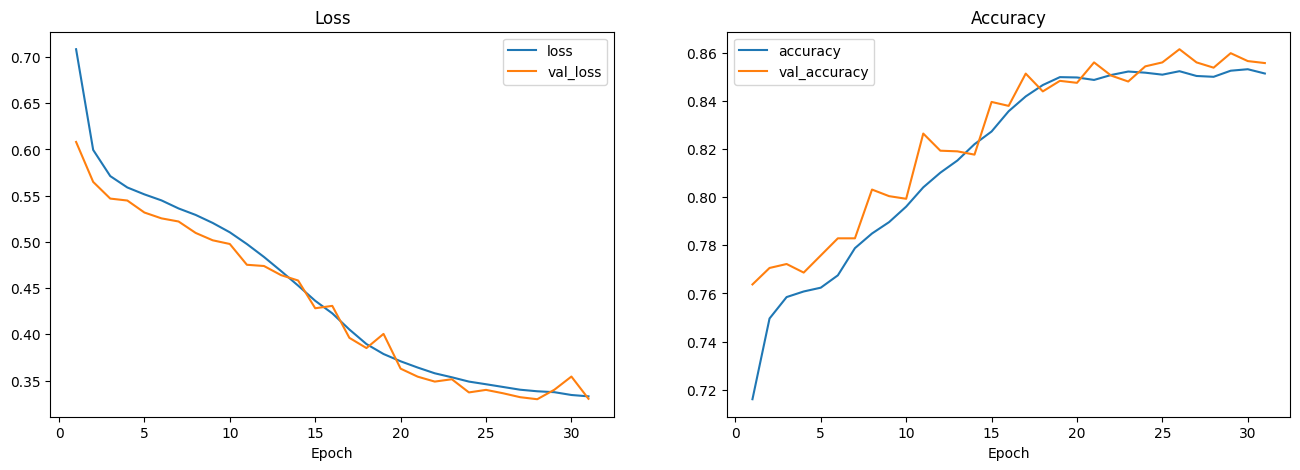

In [183]:
epoch = 31  # Replace with the actual number of epochs

fig, ax = plt.subplots(ncols=2, figsize=(16, 5))
ax[0].plot(range(1, epoch + 1), history_improve.history['loss'], label='loss')
ax[0].plot(range(1, epoch + 1), history_improve.history['val_loss'], label='val_loss')
ax[0].set_title('Loss')
ax[0].legend()
ax[0].set_xlabel('Epoch')
# ax[0].set_ylim(0,0.01)

ax[1].plot(range(1, epoch + 1), history_improve.history['accuracy'], label='accuracy')
ax[1].plot(range(1, epoch + 1), history_improve.history['val_accuracy'], label='val_accuracy')
ax[1].set_title('Accuracy')
ax[1].legend()
ax[1].set_xlabel('Epoch')
# ax[1].set_ylim(0.5, 1.5)

plt.show()

In [184]:
# Functional improved evaluation
print("Evaluate on test data")
results_improved = model_improve.evaluate(test_dataset)
print('Test - Loss     : ', results_improved[0])
print('Test - Accuracy : ', results_improved[1])
print('')

Evaluate on test data
72/72 [==============================] - 0s 2ms/step - loss: 0.3362 - accuracy: 0.8497
Test - Loss     :  0.3362424679928356
Test - Accuracy :  0.8497047



But the result for this improvement become downgrade. Maybe i should train it more but i don't have enough time for running it more. Because of my kernel was very weak, so i decided to improving in functional model.

### Functional

In [169]:
hidden_1 = tf.keras.layers.Dense(9, activation="relu", name="hidden_1")(input_layer)
hidden_1 = tf.keras.layers.BatchNormalization()(hidden_1)

hidden_2 = tf.keras.layers.Dense(40, activation="relu", name="hidden_2")(hidden_1)
hidden_2 = tf.keras.layers.BatchNormalization()(hidden_2)

hidden_3 = tf.keras.layers.Dense(10, activation="relu", name="hidden_3")(hidden_2)
hidden_3 = tf.keras.layers.BatchNormalization()(hidden_3)

concat = tf.keras.layers.concatenate([input_layer, hidden_3])

output_layer = tf.keras.layers.Dense(1,activation = "sigmoid",  name = "output_layer" )(concat)

model_func_improve = tf.keras.Model(inputs = input_layer, 
                   outputs = output_layer)

model_func_improve.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])

In this improvement i decided to add batch normalization in every layers.

In [190]:
history_func_improved = model_func_improve.fit(train_dataset, epochs=100, validation_data=val_dataset,callbacks=callbacks2)

Epoch 1/100
    229/Unknown - 4s 19ms/step - loss: 0.2793 - accuracy: 0.8514

2023-05-31 18:57:35.246823: W tensorflow/core/common_runtime/base_collective_executor.cc:216] BaseCollectiveExecutor::StartAbort Out of range: End of sequence
	 [[{{node IteratorGetNext}}]]


229/229 [==============================] - 5s 20ms/step - loss: 0.2793 - accuracy: 0.8514 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/100
228/229 [============================>.] - ETA: 0s - loss: 0.2787 - accuracy: 0.8487

2023-05-31 18:57:38.458912: W tensorflow/core/common_runtime/base_collective_executor.cc:216] BaseCollectiveExecutor::StartAbort Out of range: End of sequence
	 [[{{node IteratorGetNext}}]]


229/229 [==============================] - 3s 14ms/step - loss: 0.2787 - accuracy: 0.8487 - val_loss: 0.2604 - val_accuracy: 0.8690
Epoch 3/100
226/229 [============================>.] - ETA: 0s - loss: 0.2793 - accuracy: 0.8496

2023-05-31 18:57:41.603008: W tensorflow/core/common_runtime/base_collective_executor.cc:216] BaseCollectiveExecutor::StartAbort Out of range: End of sequence
	 [[{{node IteratorGetNext}}]]


229/229 [==============================] - 3s 14ms/step - loss: 0.2794 - accuracy: 0.8491 - val_loss: 0.2599 - val_accuracy: 0.8646
Epoch 4/100
229/229 [==============================] - 3s 14ms/step - loss: 0.2787 - accuracy: 0.8507 - val_loss: 0.2605 - val_accuracy: 0.8523


2023-05-31 18:57:44.902418: W tensorflow/core/common_runtime/base_collective_executor.cc:216] BaseCollectiveExecutor::StartAbort Out of range: End of sequence
	 [[{{node IteratorGetNext}}]]


Epoch 5/100
227/229 [============================>.] - ETA: 0s - loss: 0.2760 - accuracy: 0.8542

2023-05-31 18:57:48.083475: W tensorflow/core/common_runtime/base_collective_executor.cc:216] BaseCollectiveExecutor::StartAbort Out of range: End of sequence
	 [[{{node IteratorGetNext}}]]


229/229 [==============================] - 3s 15ms/step - loss: 0.2760 - accuracy: 0.8543 - val_loss: 0.2598 - val_accuracy: 0.8573
Epoch 6/100
228/229 [============================>.] - ETA: 0s - loss: 0.2778 - accuracy: 0.8528

2023-05-31 18:57:51.582958: W tensorflow/core/common_runtime/base_collective_executor.cc:216] BaseCollectiveExecutor::StartAbort Out of range: End of sequence
	 [[{{node IteratorGetNext}}]]


229/229 [==============================] - 3s 15ms/step - loss: 0.2778 - accuracy: 0.8531 - val_loss: 0.2574 - val_accuracy: 0.8575
Epoch 7/100
228/229 [============================>.] - ETA: 0s - loss: 0.2768 - accuracy: 0.8550

2023-05-31 18:57:55.583689: W tensorflow/core/common_runtime/base_collective_executor.cc:216] BaseCollectiveExecutor::StartAbort Out of range: End of sequence
	 [[{{node IteratorGetNext}}]]


229/229 [==============================] - 4s 18ms/step - loss: 0.2768 - accuracy: 0.8550 - val_loss: 0.2592 - val_accuracy: 0.8570
Epoch 8/100
226/229 [============================>.] - ETA: 0s - loss: 0.2755 - accuracy: 0.8552

2023-05-31 18:58:00.006997: W tensorflow/core/common_runtime/base_collective_executor.cc:216] BaseCollectiveExecutor::StartAbort Out of range: End of sequence
	 [[{{node IteratorGetNext}}]]


229/229 [==============================] - 4s 19ms/step - loss: 0.2758 - accuracy: 0.8548 - val_loss: 0.2548 - val_accuracy: 0.8614
Epoch 9/100
227/229 [============================>.] - ETA: 0s - loss: 0.2749 - accuracy: 0.8531

2023-05-31 18:58:03.705955: W tensorflow/core/common_runtime/base_collective_executor.cc:216] BaseCollectiveExecutor::StartAbort Out of range: End of sequence
	 [[{{node IteratorGetNext}}]]


229/229 [==============================] - 4s 16ms/step - loss: 0.2750 - accuracy: 0.8530 - val_loss: 0.2690 - val_accuracy: 0.8668
Epoch 10/100
226/229 [============================>.] - ETA: 0s - loss: 0.2741 - accuracy: 0.8546

2023-05-31 18:58:07.701632: W tensorflow/core/common_runtime/base_collective_executor.cc:216] BaseCollectiveExecutor::StartAbort Out of range: End of sequence
	 [[{{node IteratorGetNext}}]]


229/229 [==============================] - 4s 18ms/step - loss: 0.2746 - accuracy: 0.8544 - val_loss: 0.2583 - val_accuracy: 0.8584
Epoch 11/100
228/229 [============================>.] - ETA: 0s - loss: 0.2754 - accuracy: 0.8539

2023-05-31 18:58:11.331983: W tensorflow/core/common_runtime/base_collective_executor.cc:216] BaseCollectiveExecutor::StartAbort Out of range: End of sequence
	 [[{{node IteratorGetNext}}]]


229/229 [==============================] - 4s 15ms/step - loss: 0.2754 - accuracy: 0.8542 - val_loss: 0.2588 - val_accuracy: 0.8687


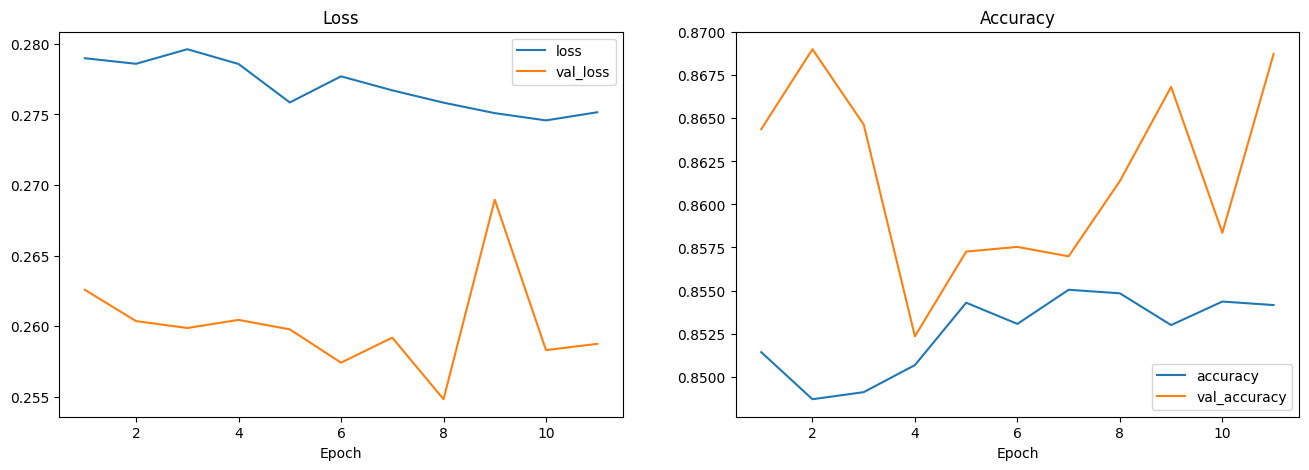

In [191]:
epoch = 11  # Replace with the actual number of epochs

fig, ax = plt.subplots(ncols=2, figsize=(16, 5))
ax[0].plot(range(1, epoch + 1), history_func_improved.history['loss'], label='loss')
ax[0].plot(range(1, epoch + 1), history_func_improved.history['val_loss'], label='val_loss')
ax[0].set_title('Loss')
ax[0].legend()
ax[0].set_xlabel('Epoch')
# ax[0].set_ylim(0,0.01)

ax[1].plot(range(1, epoch + 1), history_func_improved.history['accuracy'], label='accuracy')
ax[1].plot(range(1, epoch + 1), history_func_improved.history['val_accuracy'], label='val_accuracy')
ax[1].set_title('Accuracy')
ax[1].legend()
ax[1].set_xlabel('Epoch')
# ax[1].set_ylim(0.5, 1.5)

plt.show()

In [192]:
# Functional improved evaluation
print("Evaluate on test data")
results_func_improved = model_func_improve.evaluate(test_dataset)
print('Test - Loss     : ', results_func_improved[0])
print('Test - Accuracy : ', results_func_improved[1])
print('')

Evaluate on test data
72/72 [==============================] - 0s 4ms/step - loss: 0.2664 - accuracy: 0.8508
Test - Loss     :  0.26637880814572173
Test - Accuracy :  0.8507985



Finally my functional model improvement got upgraded, eventhough just a little bit percentage.

### Model Evaluation

train set:               precision    recall  f1-score   support

           0       0.80      0.93      0.86      6788
           1       0.93      0.80      0.86      7837

    accuracy                           0.86     14625
   macro avg       0.86      0.86      0.86     14625
weighted avg       0.87      0.86      0.86     14625

test set:               precision    recall  f1-score   support

           0       0.79      0.91      0.85      2122
           1       0.91      0.80      0.85      2449

    accuracy                           0.85      4571
   macro avg       0.85      0.86      0.85      4571
weighted avg       0.86      0.85      0.85      4571



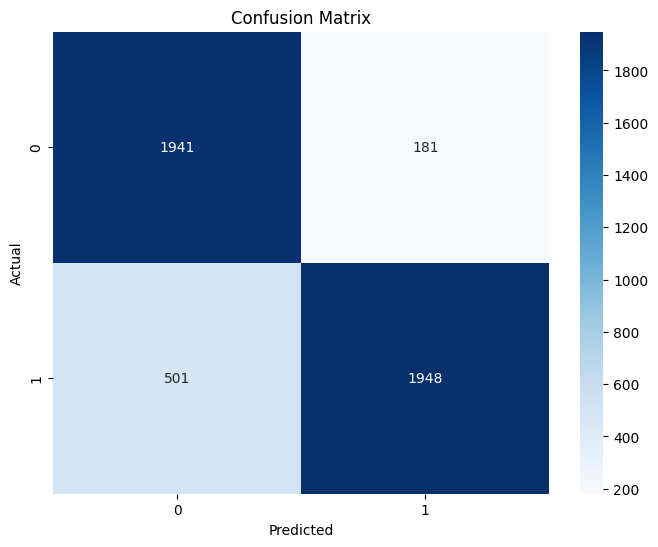

In [218]:
# predict probabilities
y_train_pred = model_func_improve.predict(train_tr)
y_train_pred_classes = (y_train_pred > 0.5).astype(int)

y_pred = model_func_improve.predict(test_tr)
y_pred_class = (y_pred > 0.5).astype(int)


train_report = classification_report(y_train, y_train_pred_classes)
test_report = classification_report(y_test, y_pred_class)

print(f'train set:',train_report)
print(100*'=')
print(f'test set:',test_report)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_class)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Over all, i decided to concern in recall score because the sensitivity of this model is very important. We should very carefully when we want to checking customer who in reality churn but in the prediction those custumers was predicted not churn.

### Model Saving

In [197]:
!pip install pyyaml h5py 

In [203]:
with open("pipe_prep.pkl", "wb") as f:
    pickle.dump(pipe_preprocess, f)
model_func_improve.save('model_last/')

2023-06-01 09:37:49.082222: W tensorflow/python/util/util.cc:299] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: model_last/assets


### Conclusion 

Based on the analysis, we can take the conclusion :  

According to the predictions of this model we can know earlier how to prevent the customer churn from their behavior. So the user can make the best decision to maintain their services for all customer.

- Retention Strategies: Identify the key factors that contribute to customer churn based on your model's predictions. Develop targeted retention strategies to address these factors and improve customer satisfaction. For example, you could offer personalized incentives, discounts, or loyalty programs to retain at-risk customers.
- Customer Engagement: Focus on enhancing customer engagement and building strong relationships. Implement proactive communication strategies to address customer concerns, provide timely support, and encourage feedback. By actively engaging with customers, you can understand their needs better and take steps to prevent churn.
- Product/Service Improvements: Analyze the feedback and preferences of churned customers to identify areas where your products or services can be improved. Use this information to refine your offerings and meet the evolving needs of your customer base. Continuous improvement can help increase customer satisfaction and reduce churn.
- Customer Segmentation: Utilize your churn predictions to segment your customer base. Identify high-value customers who are at risk of churning and prioritize your retention efforts towards them. By focusing on the most valuable customers, you can allocate your resources more effectively and maximize your retention efforts.
- Monitoring and Evaluation: Continuously monitor customer churn rates and track the impact of your retention strategies. Regularly evaluate the effectiveness of your actions by comparing churn rates before and after implementing specific initiatives. This iterative process helps you understand what works best and refine your approach accordingly.
- Customer Feedback Loop: Establish a feedback loop with your customers to gather insights and understand their experiences. Encourage customers to provide feedback through surveys, interviews, or online platforms. This feedback can provide valuable information for further improving your products, services, and overall customer experience.

This models belong to goodfit chategory, it seen from the recall score between train and test set. Certainly, it shhould improved more for the next utilization.